In [2]:
# -*- coding: utf-8 -*-
# importing libraries
import matplotlib 
matplotlib.use('Agg')
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from pylab import *
# Important to download matlab files
import scipy.io
from numpy import linspace
from numpy import meshgrid
import numpy.ma as madd

import netCDF4
from netCDF4 import Dataset

%matplotlib inline

In [3]:
def importNetcdf(path,variable_name):
    nc_fid = Dataset(path, 'r')
    field = nc_fid.variables[variable_name][:]     
    return field 

In [4]:
# Path to cloud data in the EP
path = '/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/data/EP_region.nc'

In [5]:
# Path to enviromental variables
# temp
path_T = '/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Codes/ERA5/t2m_daymean_tropics_2008_EP_big.nc'

In [6]:
# Import clouds
year_Ci_masked = importNetcdf(path,'class1') # Cirrus clouds
# Import environment
year_t_masked = importNetcdf(path_T,'t2m') # t at 2 meter

In [7]:
# lon and lat for clouds
lon = importNetcdf(path,'lon')# longitude
lat = importNetcdf(path,'lat')# latitude

In [8]:
# lon and lat for environment
lon_1 = importNetcdf(path_T,'longitude')# longitude
lat_1 = importNetcdf(path_T,'latitude')# latitude

In [14]:
# import border and domain maps
path_dom_cirrus = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_cirrus.txt"
path_dom_cumulus = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_cumulus.txt"
path_dom_low_clouds = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_lowclouds.txt"
path_dom_t2m = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_T2m.txt"
path_dom_se = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_SE.txt"
path_dom_w = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/domains_map/domainMap_w_200hPa.txt"

In [15]:
path_bMap_cirrus = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_Cirrus.txt"
path_bMap_cumulus = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_Cumulus.txt"
path_bMap_low_clouds = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_low_clouds.txt"
path_bMap_t2m = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_T2m.txt"
path_bMap_se = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_se.txt"
path_bMap_w = "/Users/fabrizio/Dropbox/PHD/Phd/Project/LowCloudCover_and_DC/Main_analysis/analysis/DimReduction_EP_Atl/dMaps/results_dMaps/borderMaps/bmap_w_200hPa.txt"

In [16]:
dom_cirrus = np.loadtxt(path_dom_cirrus)
dom_cumulus = np.loadtxt(path_dom_cumulus)
dom_low_clouds = np.loadtxt(path_dom_low_clouds)
dom_t2m = np.loadtxt(path_dom_t2m)
dom_se = np.loadtxt(path_dom_se)
dom_w = np.loadtxt(path_dom_w)

In [18]:
bMap_cirrus = np.loadtxt(path_bMap_cirrus)
bMap_cumulus = np.loadtxt(path_bMap_cumulus)
bMap_low_clouds = np.loadtxt(path_bMap_low_clouds)
bMap_t2m = np.loadtxt(path_bMap_t2m)
bMap_se = np.loadtxt(path_bMap_se)
bMap_w = np.loadtxt(path_bMap_w)

In [19]:
dom_cirrus[dom_cirrus==0] = np.nan
dom_cumulus[dom_cumulus==0] = np.nan
dom_low_clouds[dom_low_clouds==0] = np.nan
dom_t2m[dom_t2m==0] = np.nan
dom_se[dom_se==0] = np.nan
dom_w[dom_w==0] = np.nan

In [20]:
bMap_cirrus[bMap_cirrus==0] = np.nan
bMap_cumulus[bMap_cumulus==0] = np.nan
bMap_low_clouds[bMap_low_clouds==0] = np.nan
bMap_t2m[bMap_t2m==0] = np.nan
bMap_se[bMap_se==0] = np.nan
bMap_w[bMap_w==0] = np.nan

In [39]:
def plotField_clouds(field, bMap, title, savingTitle):
    
    #max_value = np.max(field)

    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])    
        
    map = Basemap(projection='cyl',
                llcrnrlat=-30,urcrnrlat=15,\
                llcrnrlon=-140,urcrnrlon=-70)
    map.drawcoastlines()
    map.drawparallels(np.arange(-30.,20.,10.), \
              labels=[1,0,0,0],fontsize = 20)
    map.drawmeridians(np.arange(-180.,180.,30.), \
              labels=[0,0,0,1],fontsize = 20)
    #map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(lon,lat,field,cmap=plt.cm.nipy_spectral)
    map.drawcoastlines()

    #ticks = [100000,200000,300000,400000,500000,600000,700000],
    #cb=plt.colorbar(ticks = [0,0.2,0.4,0.6,0.8,1],location='bottom',aspect=30,pad=0.08)
    #cb=plt.colorbar(location='bottom',aspect=30,pad=0.08)
    #cb.ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1'])
    #cb.ax.text(0.5, 0.5, r'$\times$10$^{5}$',va='bottom', ha='right',size = 25)
    #font_size = 20 # Adjust as appropriate. va='bottom', ha='right'
    #cb.ax.tick_params(labelsize=25)
    
    map.pcolor(lon,lat,bMap,cmap=plt.cm.inferno)

    plt.title(title, fontsize = 30)

    savefig(savingTitle, bbox_inches='tight')

In [49]:
def plotField_field(field, bMap, title, savingTitle):
    
    #max_value = np.max(field)

    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])    
        
    map = Basemap(projection='cyl',
                llcrnrlat=-30,urcrnrlat=15,\
                llcrnrlon=-140,urcrnrlon=-70)
    map.drawcoastlines()
    map.drawparallels(np.arange(-30.,20.,10.), \
              labels=[1,0,0,0],fontsize = 20)
    map.drawmeridians(np.arange(-180.,180.,30.), \
              labels=[0,0,0,1],fontsize = 20)
    #map.fillcontinents(color = 'black')
    
    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(lon_1,lat_1,field,cmap=plt.cm.nipy_spectral)
    map.drawcoastlines()

    #ticks = [100000,200000,300000,400000,500000,600000,700000],
    #cb=plt.colorbar(ticks = [0,0.2,0.4,0.6,0.8,1],location='bottom',aspect=30,pad=0.08)
    #cb=plt.colorbar(location='bottom',aspect=30,pad=0.08)
    #cb.ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1'])
    #cb.ax.text(0.5, 0.5, r'$\times$10$^{5}$',va='bottom', ha='right',size = 25)
    #font_size = 20 # Adjust as appropriate. va='bottom', ha='right'
    #cb.ax.tick_params(labelsize=25)
    
    map.pcolor(lon_1,lat_1,bMap,cmap=plt.cm.inferno)

    plt.title(title, fontsize = 30)

    savefig(savingTitle, bbox_inches='tight')

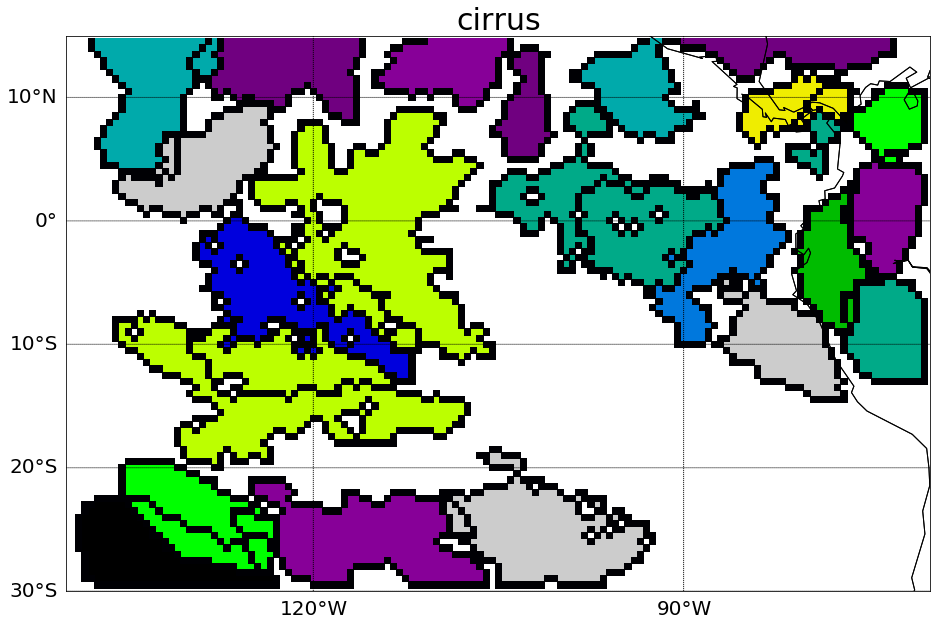

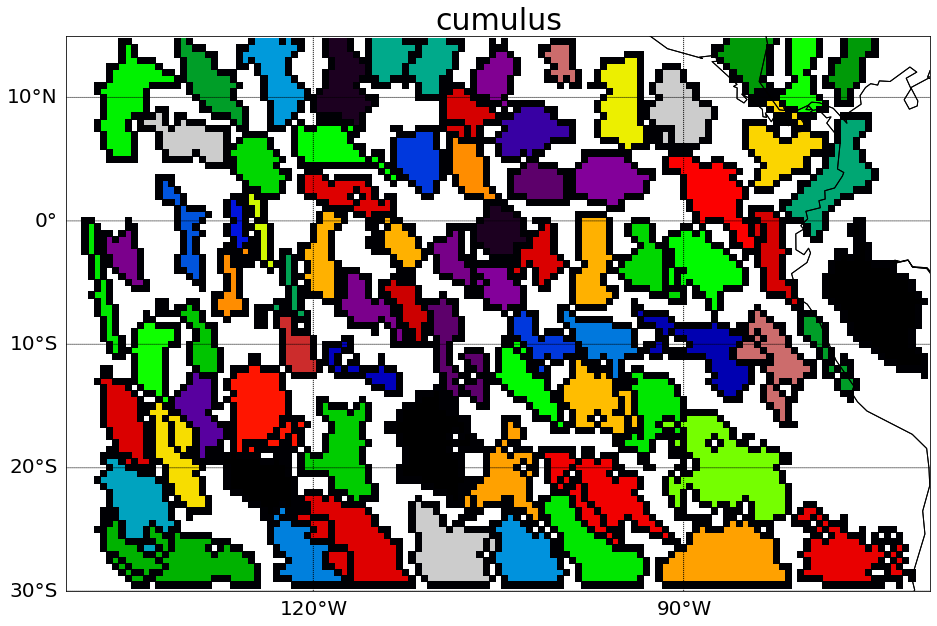

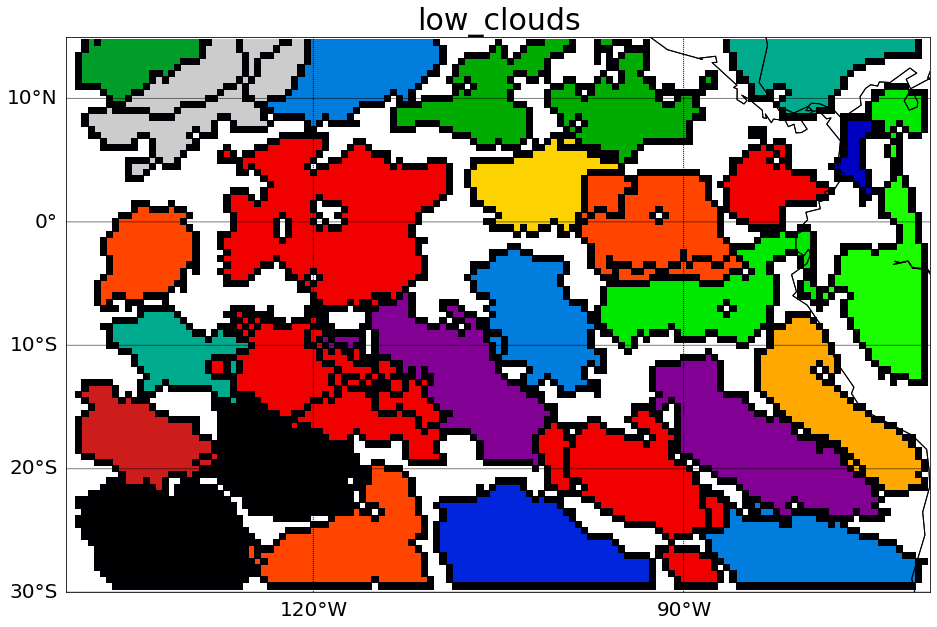

In [43]:
plotField_clouds(dom_cirrus, bMap_cirrus, 'cirrus', 'cirrus')
plotField_clouds(dom_cumulus, bMap_cumulus, 'cumulus', 'cumulus')
plotField_clouds(dom_low_clouds, bMap_low_clouds, 'low_clouds', 'low_clouds')

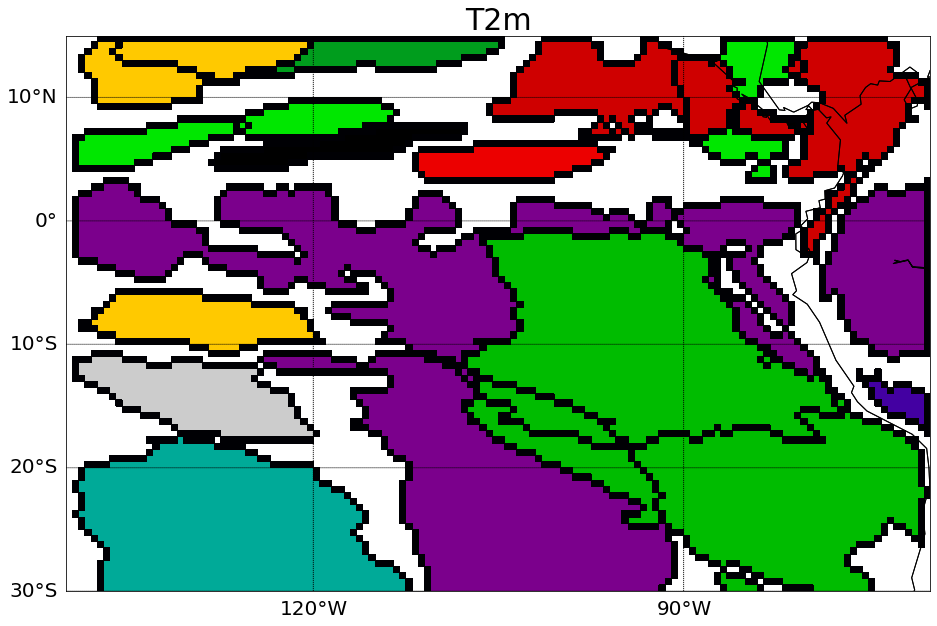

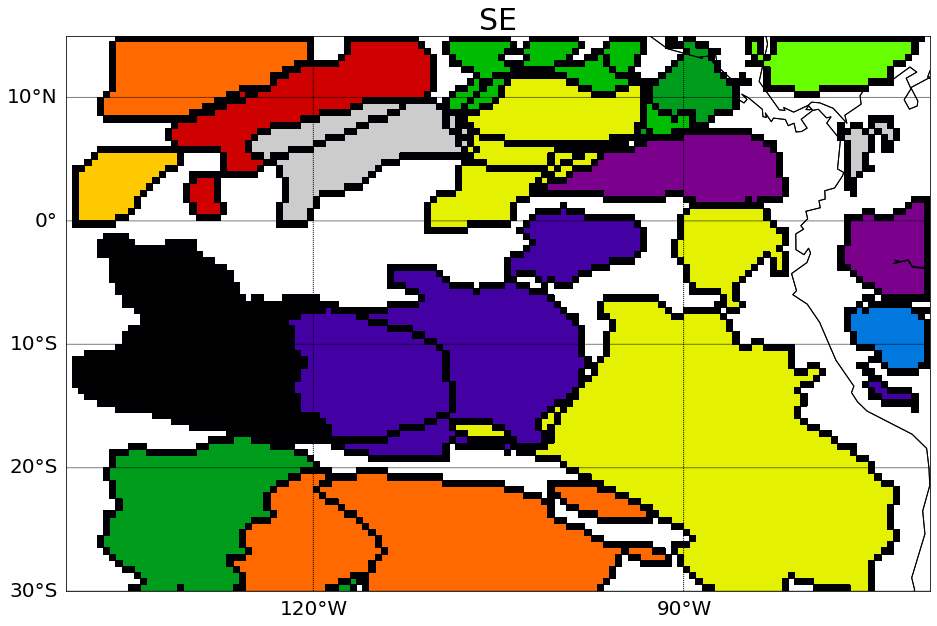

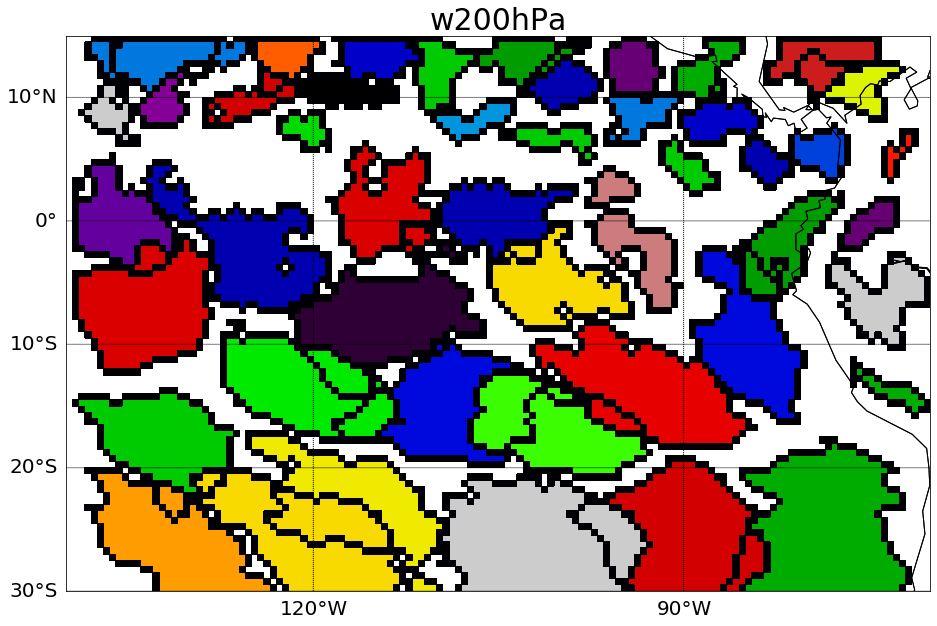

In [50]:
plotField_field(dom_t2m, bMap_t2m, 'T2m', 'T2m')
plotField_field(dom_se, bMap_se, 'SE', 'SE')
plotField_field(dom_w, bMap_w, 'w200hPa', 'w200hPa')

In [48]:
dom_t2m.shape

(91, 141)

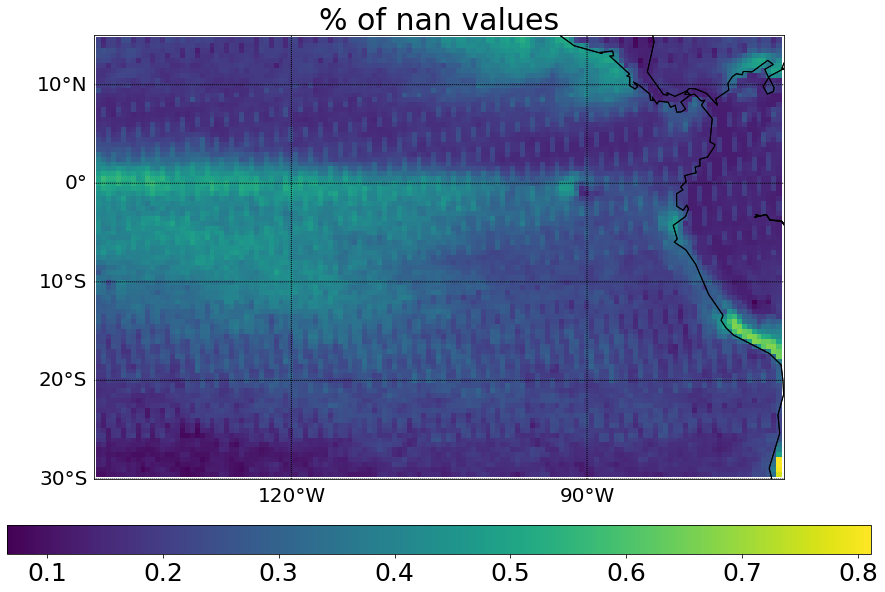

In [34]:
plotField(occ_of_NaNs, '% of nan values', 'nan_percentage.png')

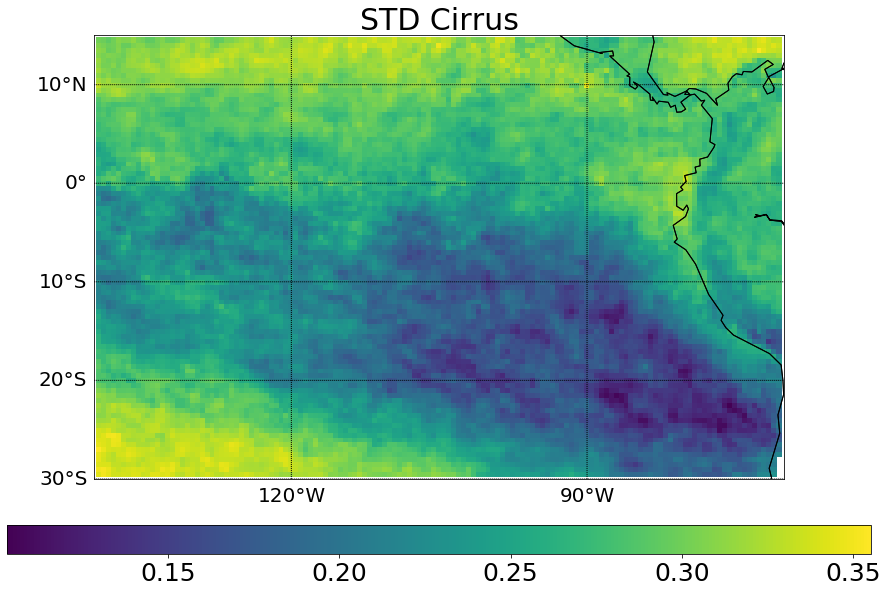

In [35]:
plotField(year_Ci_a_std, 'STD Cirrus', 'STD_Ci.png')

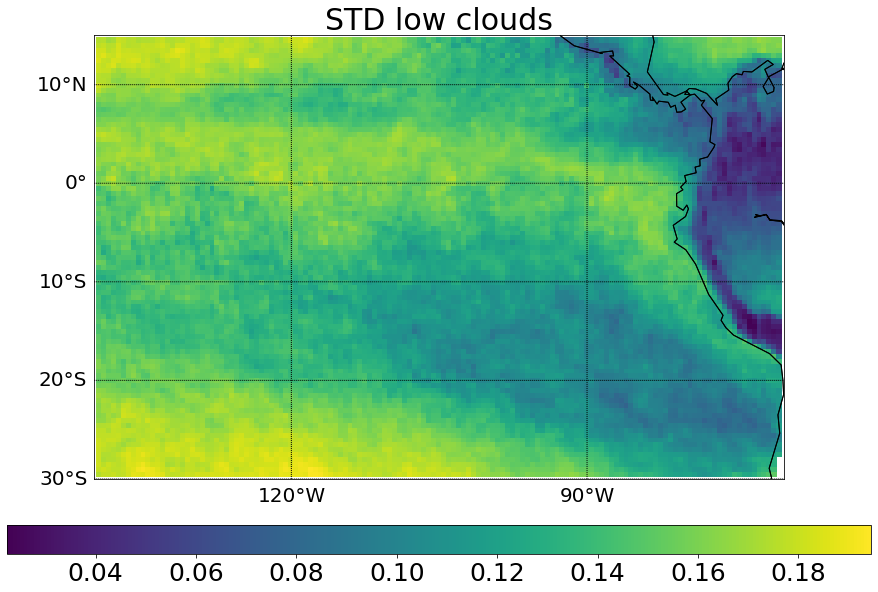

In [36]:
plotField(year_LowClouds_a_std, 'STD low clouds', 'STD_LowClouds.png')

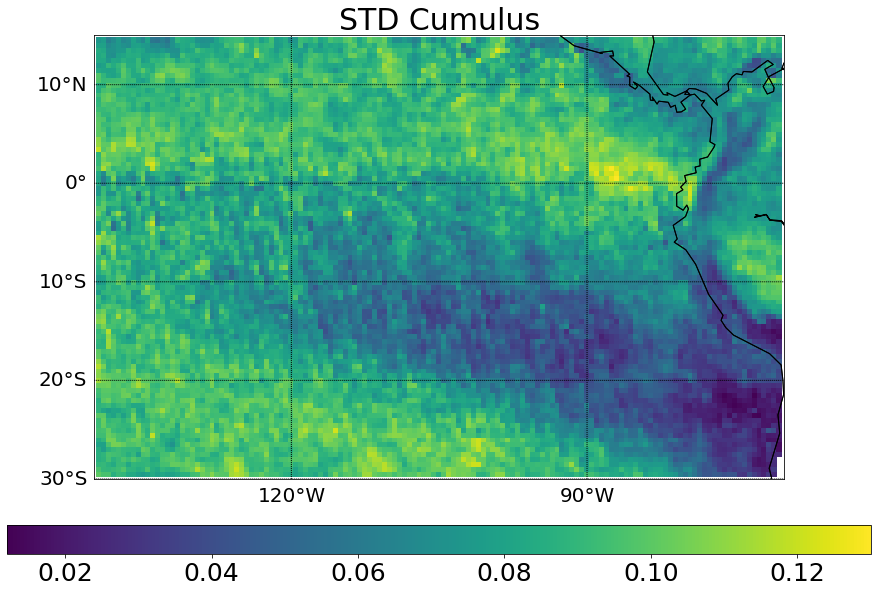

In [37]:
plotField(year_Cu_a_std, 'STD Cumulus', 'STD_Cu.png')

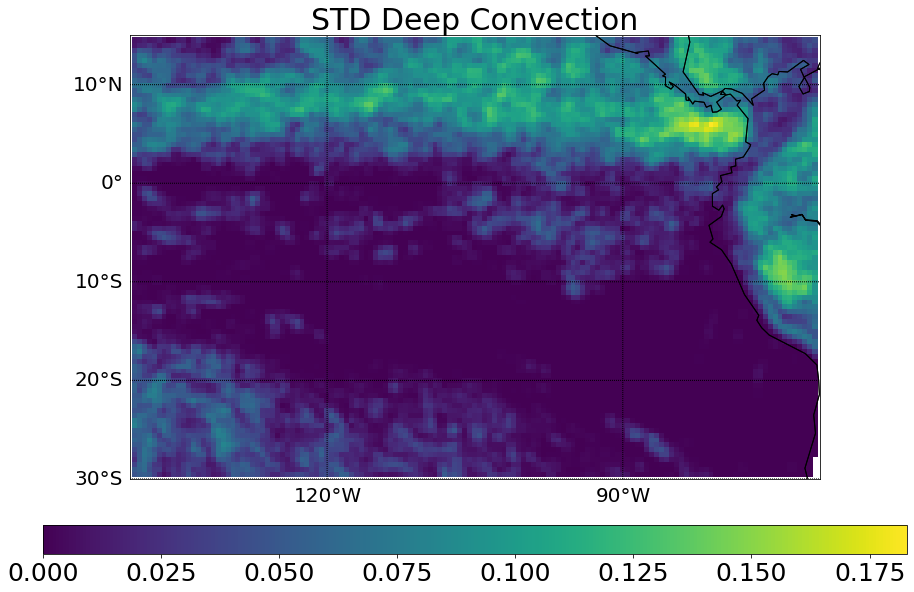

In [38]:
plotField(year_Dc_a_std, 'STD Deep Convection', 'STD_Dc.png')

In [ ]:
# When plotting the enviromental data remember to change lon and lat to lon_1 and lat_1
# the enviromental guys have 1 more point in both latitude and longitude

In [ ]:
plotField(year_t_a_std, 'STD T2m', 'STD_T2m.png')

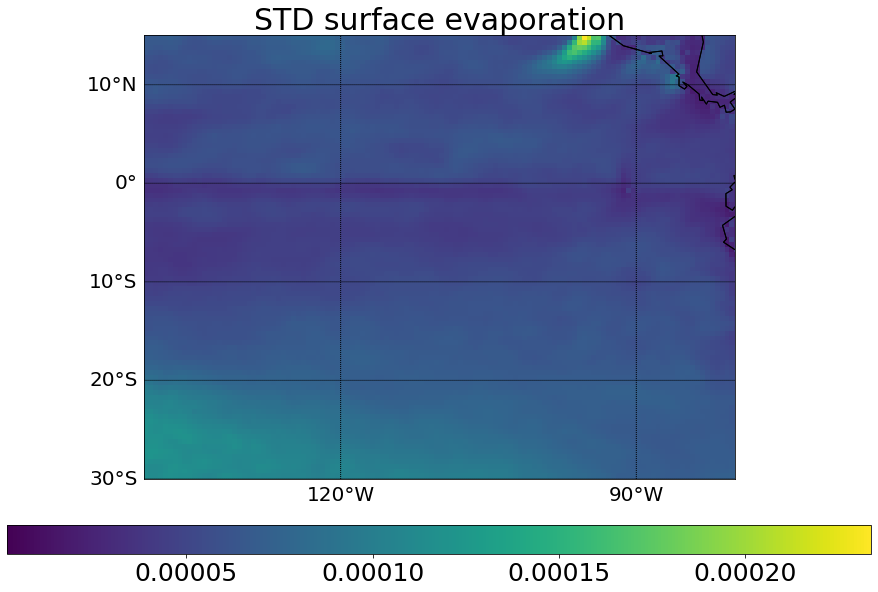

In [39]:
plotField(year_e_a_std, 'STD surface evaporation', 'STD_SE.png')

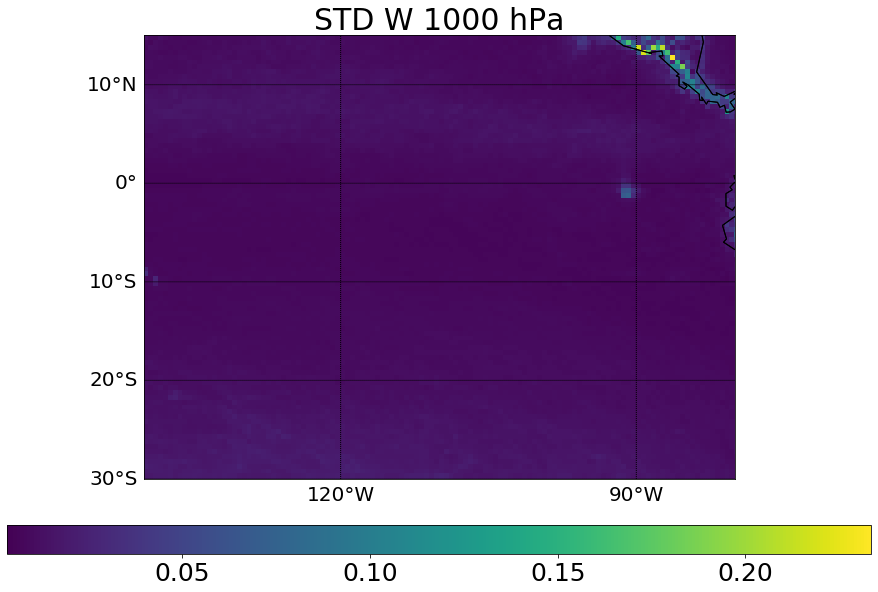

In [40]:
plotField(year_w_1000_a_std, 'STD W 1000 hPa', 'STD_W_1000hPa.png')

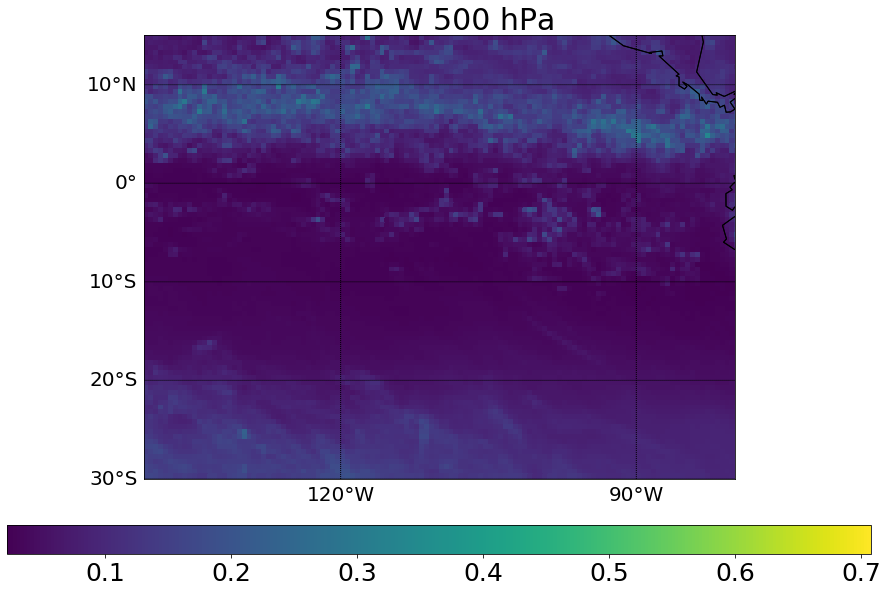

In [41]:
plotField(year_w_500_a_std, 'STD W 500 hPa', 'STD_W_500hPa.png')

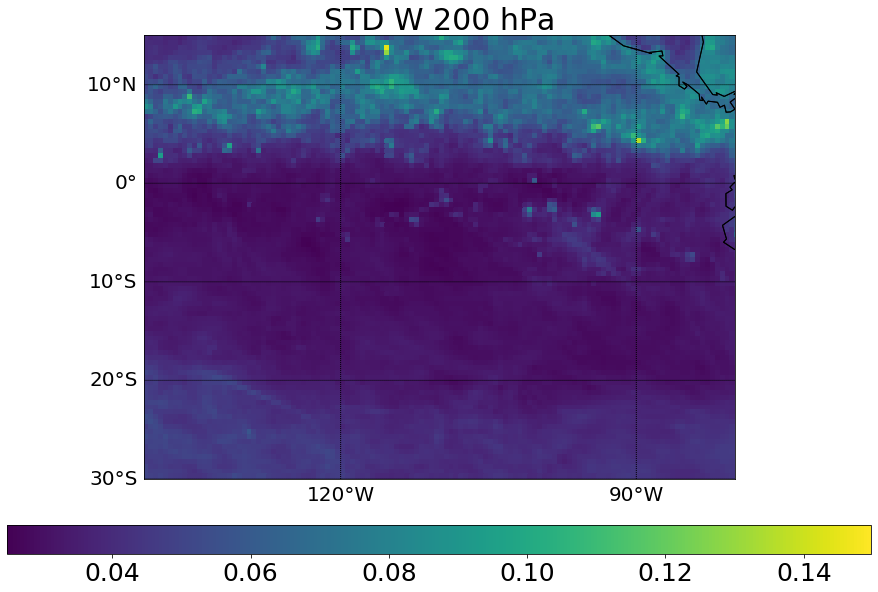

In [42]:
plotField(year_w_200_a_std, 'STD W 200 hPa', 'STD_W_200hPa.png')

In [198]:
# Let's look also at the occurrences
occurrence_Ci = np.nanmean(year_Ci_masked_ip, axis = 0)
occurrence_LowClouds = np.nanmean(year_LowClouds_masked_ip,axis = 0)
occurrence_Cu = np.nanmean(year_Cu_masked_ip,axis = 0)
occurrence_Dc = np.nanmean(year_Dc_masked_ip,axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


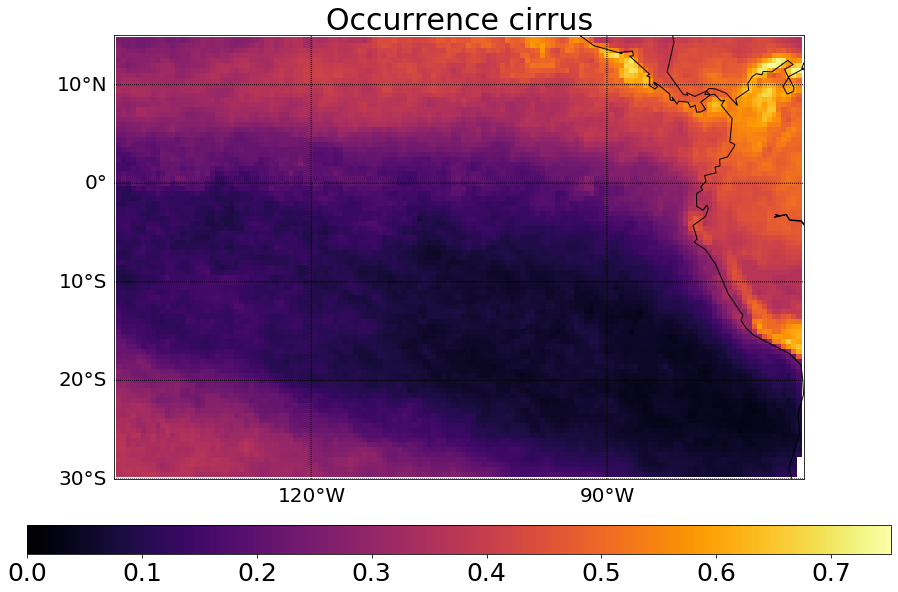

In [115]:
plotField(occurrence_Ci, 'Occurrence cirrus', 'Ci_occ.png')

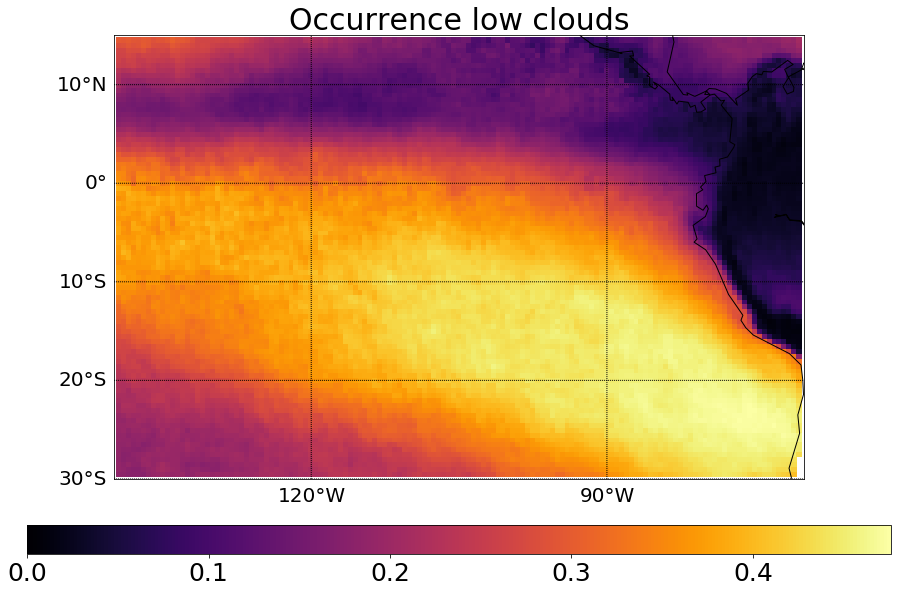

In [114]:
plotField(occurrence_LowClouds, 'Occurrence low clouds', 'lowClouds_occ.png')

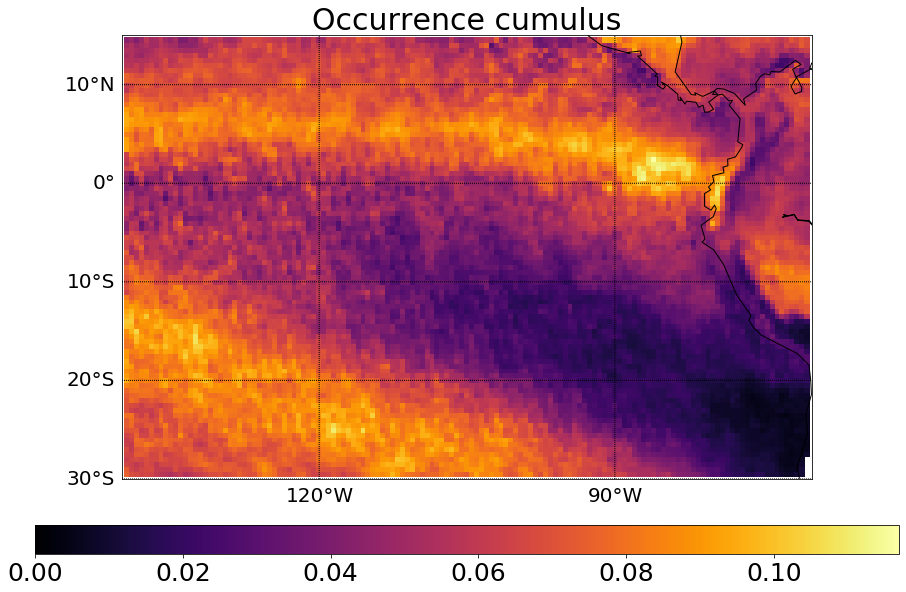

In [145]:
plotField(occurrence_Cu, 'Occurrence cumulus', 'Cu_occ.png')

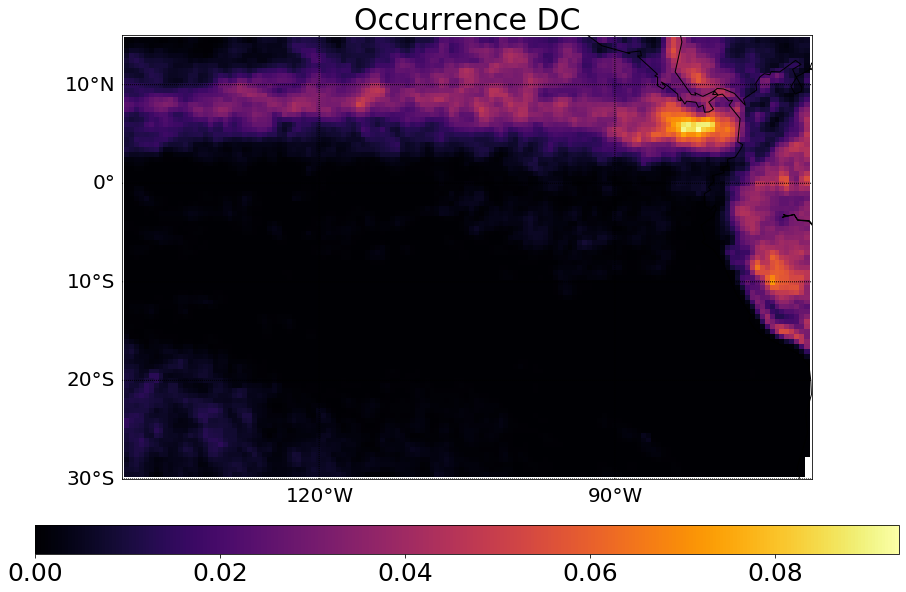

In [200]:
plotField(occurrence_Dc, 'Occurrence DC', 'DC_occ.png')